# Transfer learning _ResNet-50

# 1.Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# 2.Loading data/ Preprocessing

In [3]:
data_dir = "dermnet/train"#directory of the  train data
test_dir = "dermnet/test"#directory of the  test data

In [4]:
img_height,img_width=180,180#Size of the image
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),# resize images after they are read from folder
  batch_size=batch_size)#Size of the batches of data to load at a time

Found 24855 files belonging to 23 classes.
Using 19884 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24855 files belonging to 23 classes.
Using 4971 files for validation.


In [6]:
#testing data preprocessing
test_ds =tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,#directory of the  test data
    shuffle = True,
    seed=123,
    image_size =(img_height, img_width),
    batch_size = 32  
)

Found 4317 files belonging to 23 classes.


In [7]:
class_names=train_ds.class_names
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


# 3.Data Visualization/Plotting

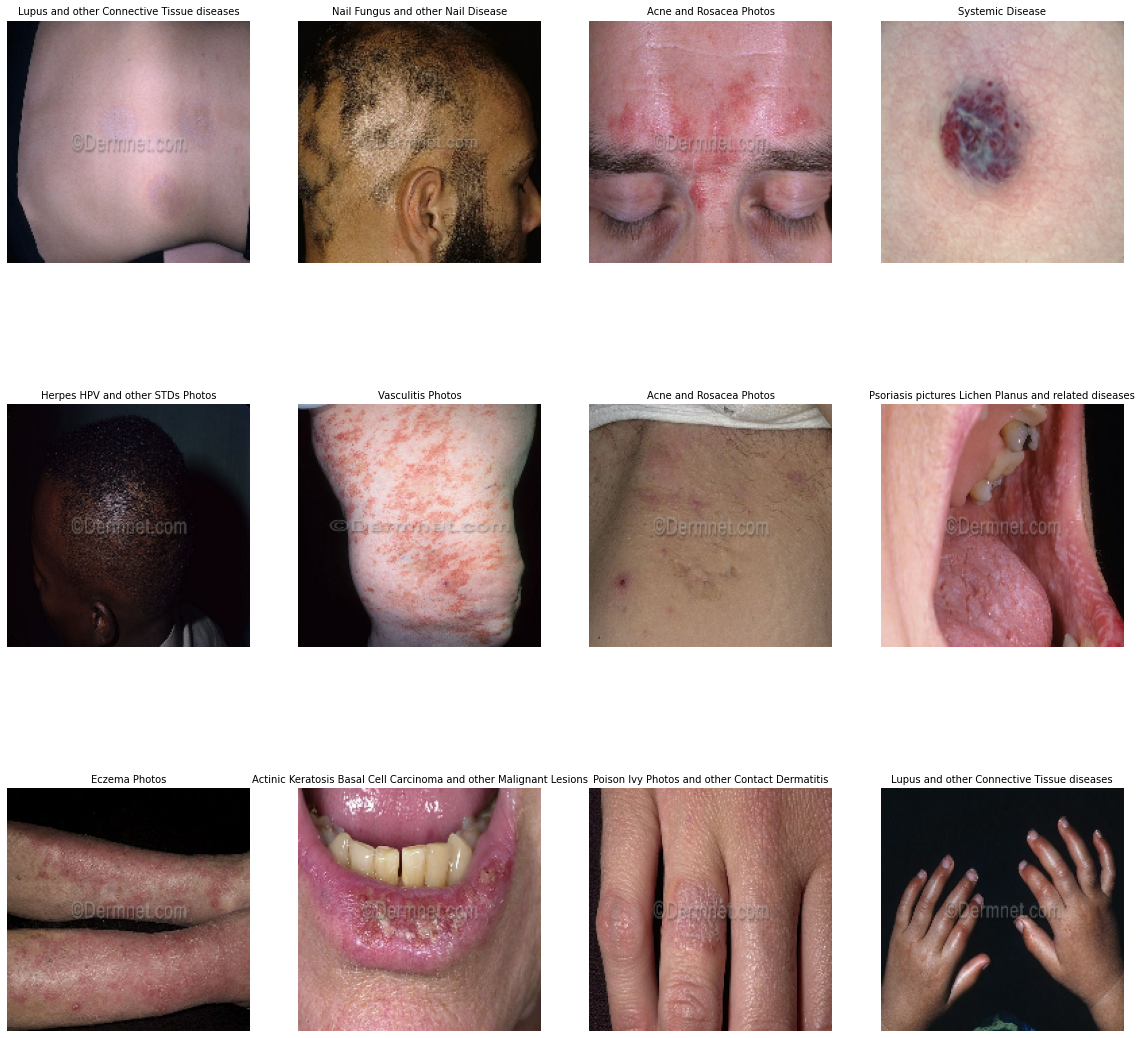

In [12]:
#using matplotlib to visualize the images in the dataset 
plt.figure(figsize = (20,20))#setting the size images in plot only
for images, labels in train_ds.take(1):#looping through the dataset
   for i in range(12):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(images[i].numpy().astype("uint8"))
     plt.title(class_names[labels[i]],fontsize = 10)
     plt.axis("off")